The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.
grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -979500 to -979561.086941
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -600000 to -599864.470502
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from -1350000 to -1350225.03799
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from -1101000 to -1100865.03746


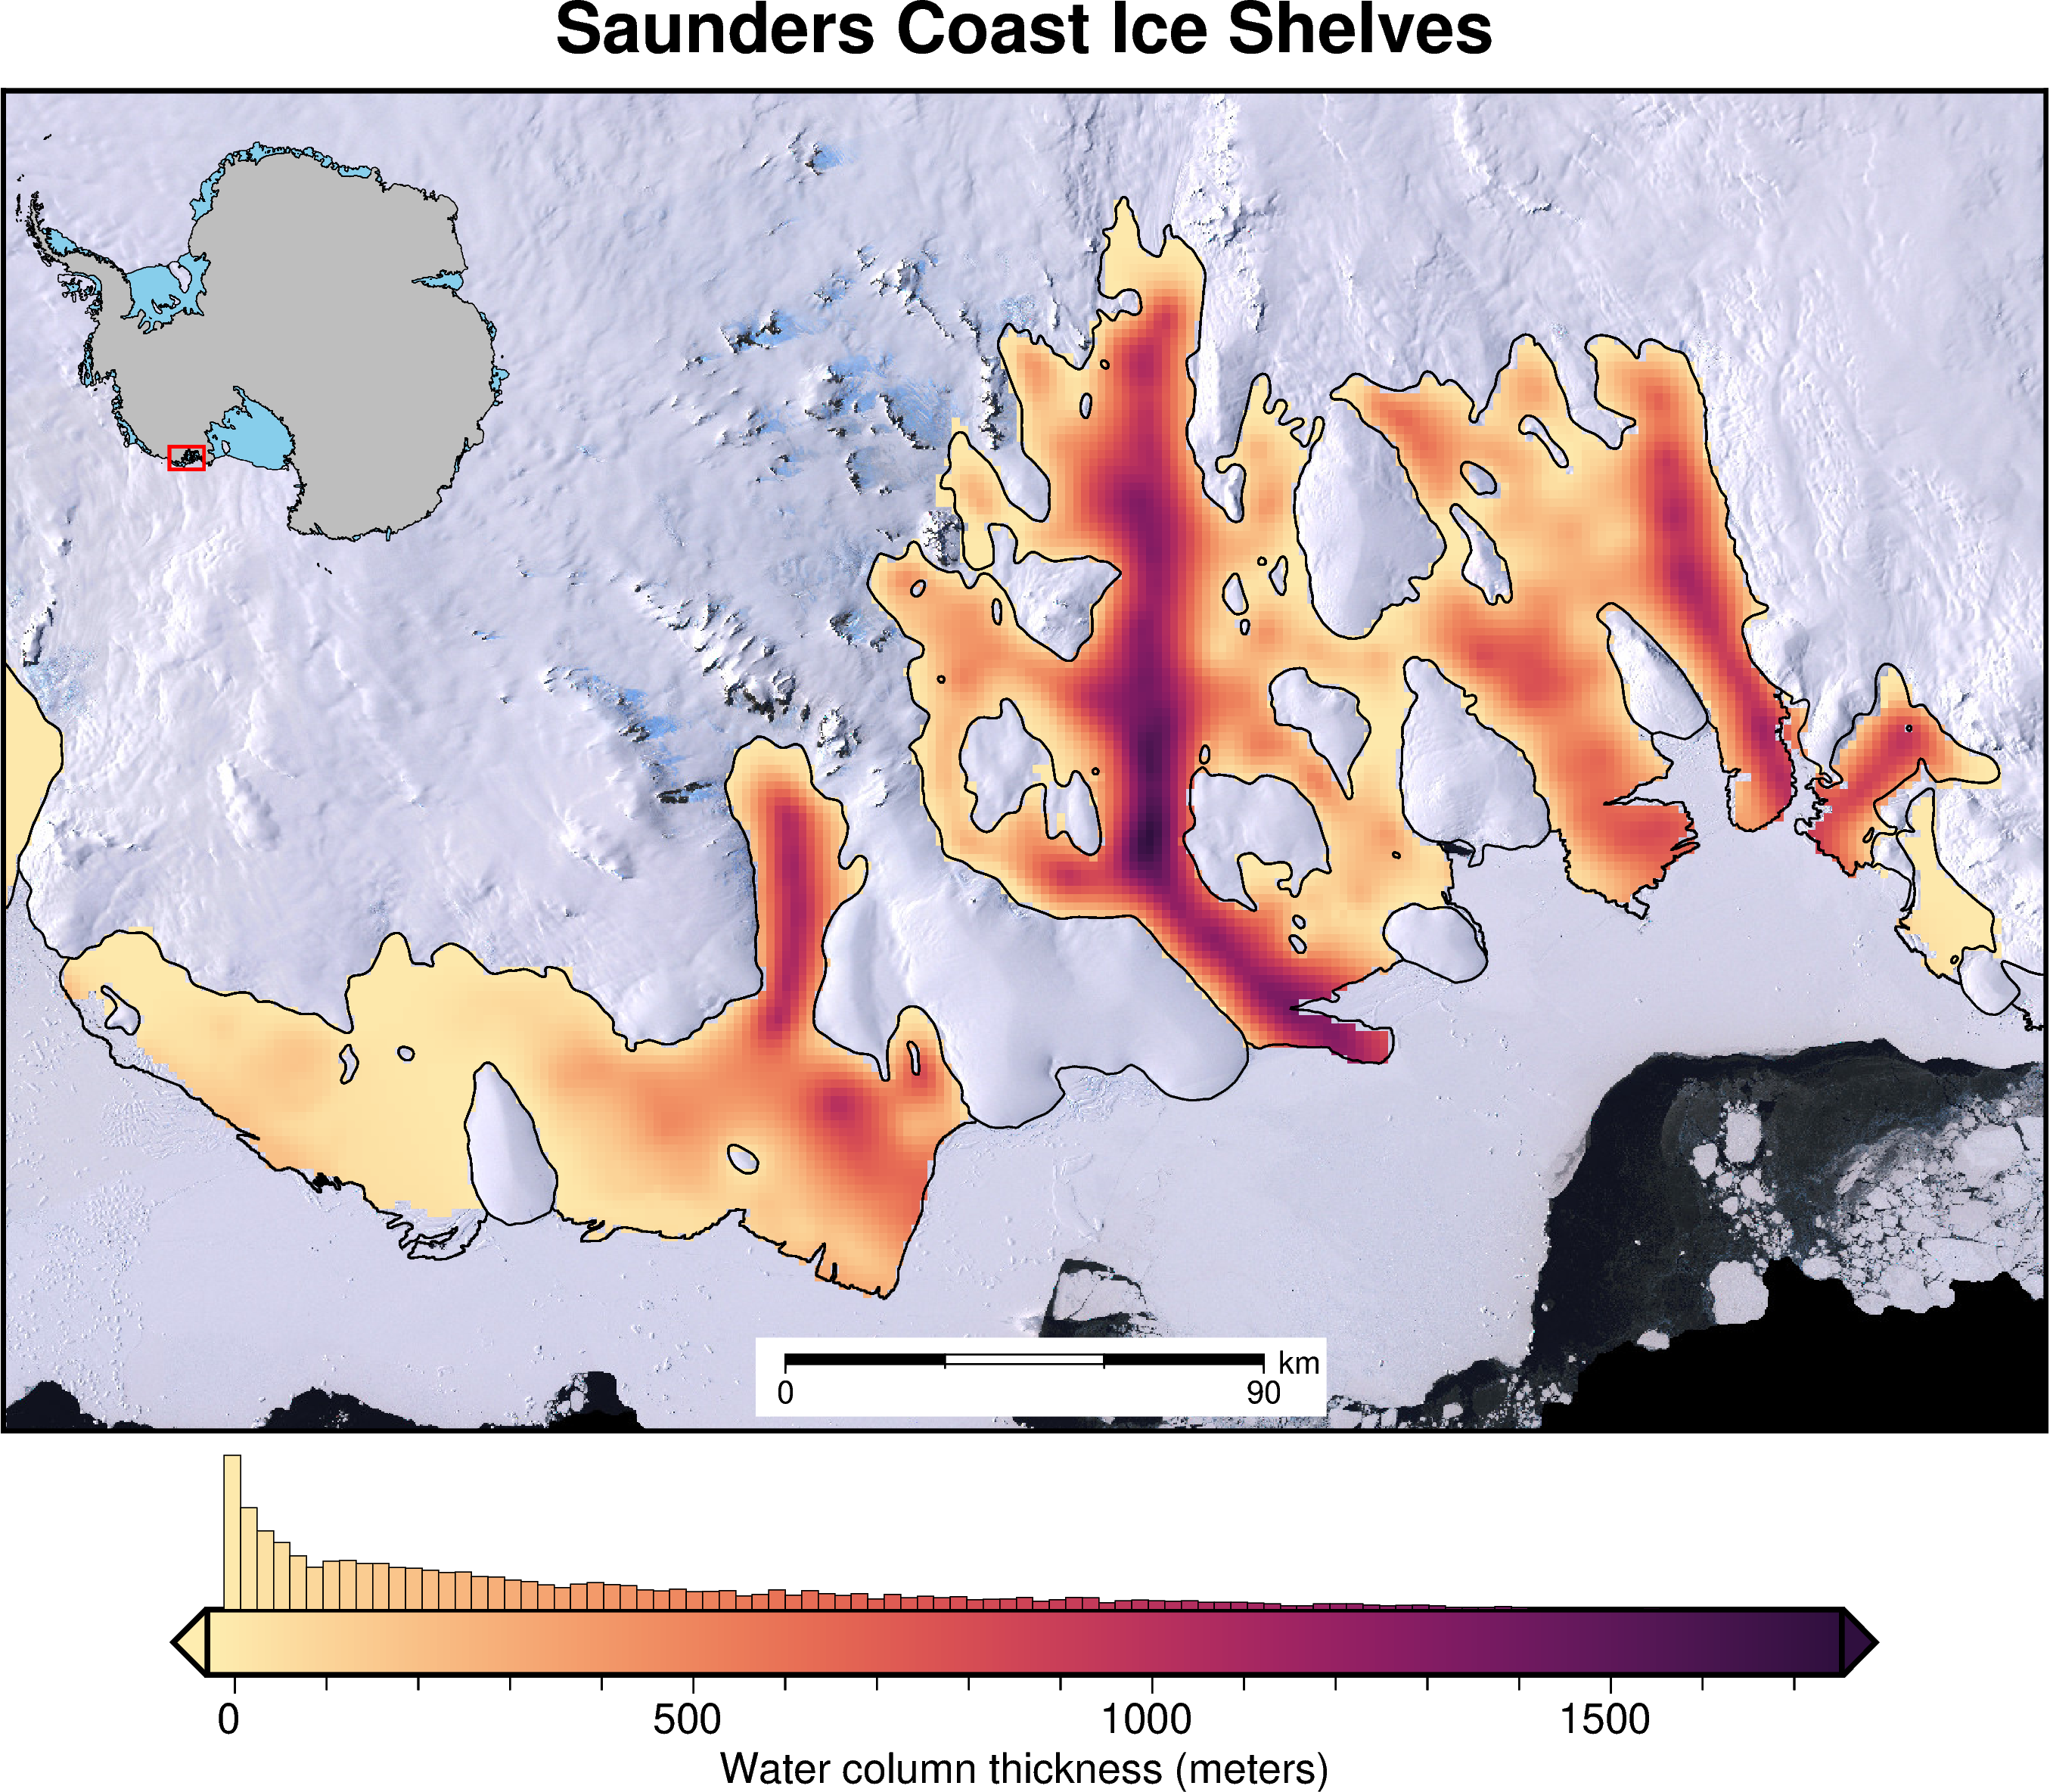

In [18]:
%load_ext autoreload
%autoreload 2

# import modules
from polartoolkit import fetch, maps, regions, utils

# define a geographic region
region = regions.saunders_coast

# download and pre-process bedmap2 data
water_thickness = fetch.bedmap2(
    layer="water_thickness",
    region=region,
    spacing=1500,
)

# mask areas outside of ice shelves
water_thickness = utils.mask_from_shp(
    fetch.antarctic_boundaries(version="IceShelf"),
    xr_grid=water_thickness,
    masked=True,
    invert=False,
    hemisphere="south",
)

# plot map and set options
fig = maps.plot_grd(
    water_thickness,
    cmap="matter",
    title="Saunders Coast Ice Shelves",
    cbar_label="Water column thickness (meters)",
    imagery_basemap=True,
    coast=True,
    inset=True,
    scalebar=True,
    hist=True,
    hemisphere="south",
)

# display figure
fig.show()

In [19]:
fig.savefig("example_figure.png", dpi=1000)